In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
happiness_data = pd.read_excel("../Data/DataForTable2.1.xls")
regions_data = pd.read_csv("../Data/happiness_country_region.csv")
education_data = pd.read_csv("../Data/NATMON_DS_08122024160724706.csv")
education_country_data = pd.read_csv("../Data/education_country_region.csv")

# Merge datasets
happiness_data["year"] = happiness_data["year"].astype(int)
happiness_data = happiness_data.merge(
    regions_data, how="left", left_on="Country name", right_on="Country"
)

# Filter data for years >= 2007
happiness_filtered = happiness_data[happiness_data["year"] >= 2007]

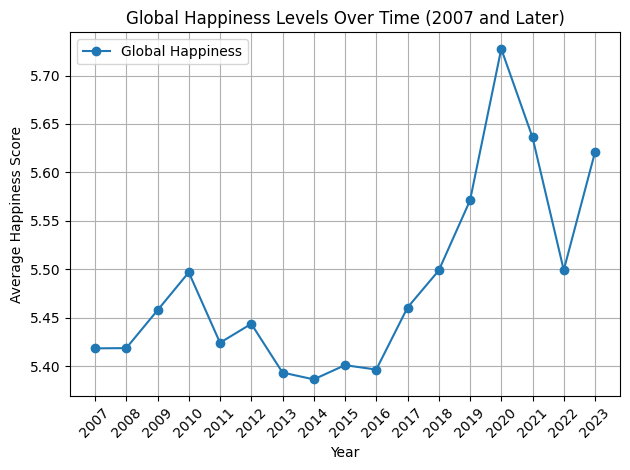

In [ ]:
# Question 1 - How have global happiness levels changed over time? Is there a clear trend?

global_trend = happiness_filtered.groupby("year")["Life Ladder"].mean().reset_index()

# Plot global happiness trend
plt.plot(
    global_trend["year"],
    global_trend["Life Ladder"],
    marker="o",
    label="Global Happiness",
)
plt.title("Global Happiness Levels Over Time (2007 and Later)")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)
plt.xticks(global_trend["year"], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig("../Graph/global_happiness_trend.png")
plt.show()

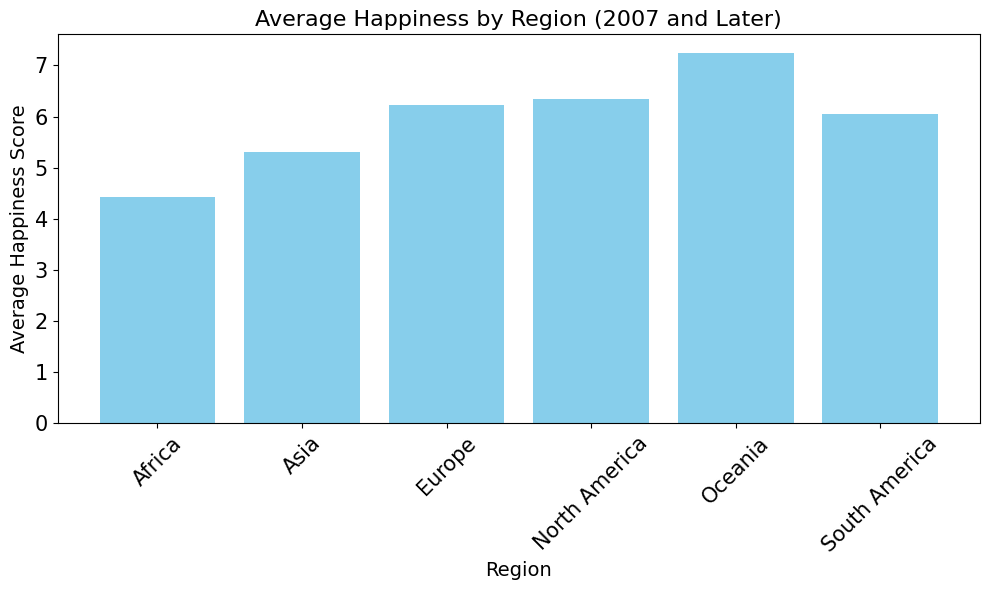

In [3]:
# Question 1 - What does happiness look like across different regions?

region_happiness = (
    happiness_filtered.groupby("Region")["Life Ladder"].mean().reset_index()
)
# Plot happiness by region
plt.figure(figsize=(10, 6))
plt.bar(region_happiness["Region"], region_happiness["Life Ladder"], color="skyblue")
plt.title("Average Happiness by Region (2007 and Later)", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Average Happiness Score", fontsize=14)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("../Graph/happiness_by_region.png")
plt.show()

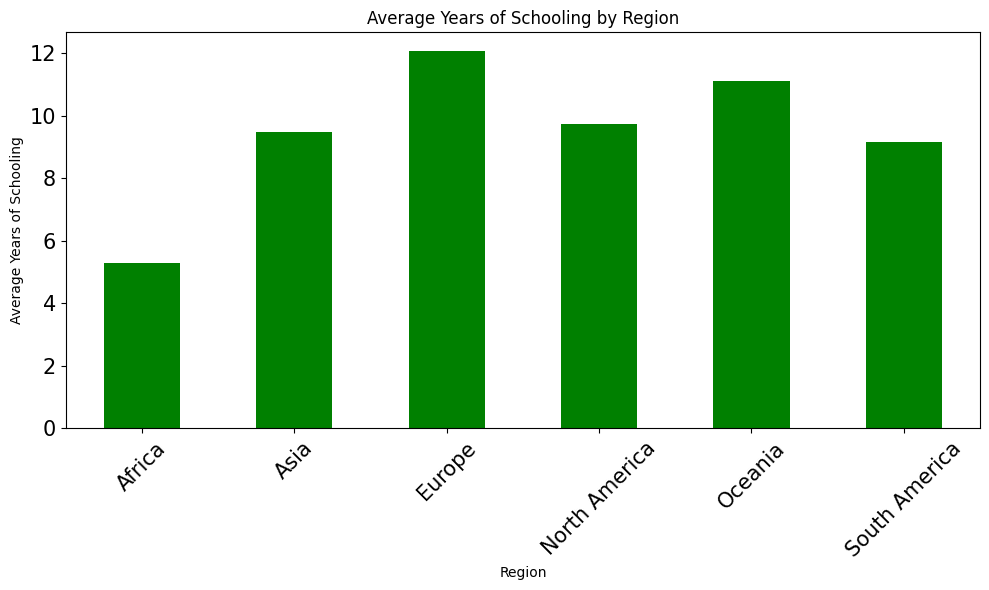

In [4]:
# Question 3: Does Education have any correlation with happiness?
df = education_country_data.merge(education_data, on="Country")

# Group by "Region" and calculate the mean of the average years of schooling
average_schooling_by_region = df.groupby("Region")["Value"].mean()

# Plot Average Year of Schooling by
plt.figure(figsize=(10, 6))
average_schooling_by_region.plot(kind="bar", color="green")
plt.title("Average Years of Schooling by Region")
plt.xlabel("Region")
plt.ylabel("Average Years of Schooling")
plt.xticks(rotation=45)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("../Graph/education_by_region.png")
plt.show()

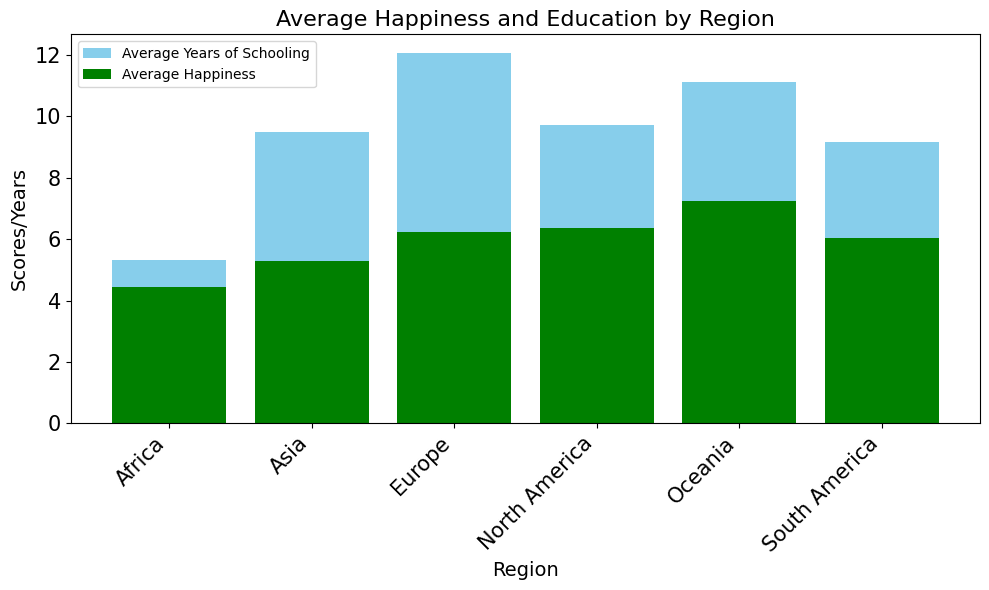

In [5]:
# Combining the previous 2 plots to visualzie any correlations

plt.figure(figsize=(10, 6))

# First plot (education)
plt.bar(
    average_schooling_by_region.index,
    average_schooling_by_region,
    color="skyblue",
    label="Average Years of Schooling",
)
# Second Plot (region)
plt.bar(
    region_happiness["Region"],
    region_happiness["Life Ladder"],
    color="green",
    label="Average Happiness",
)
plt.title("Average Happiness and Education by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Scores/Years", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig("../Graph/happiness_by_education_by_region.png")
plt.show()

C:\Users\copy\AppData\Local\Temp\ipykernel_13340\2139479142.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


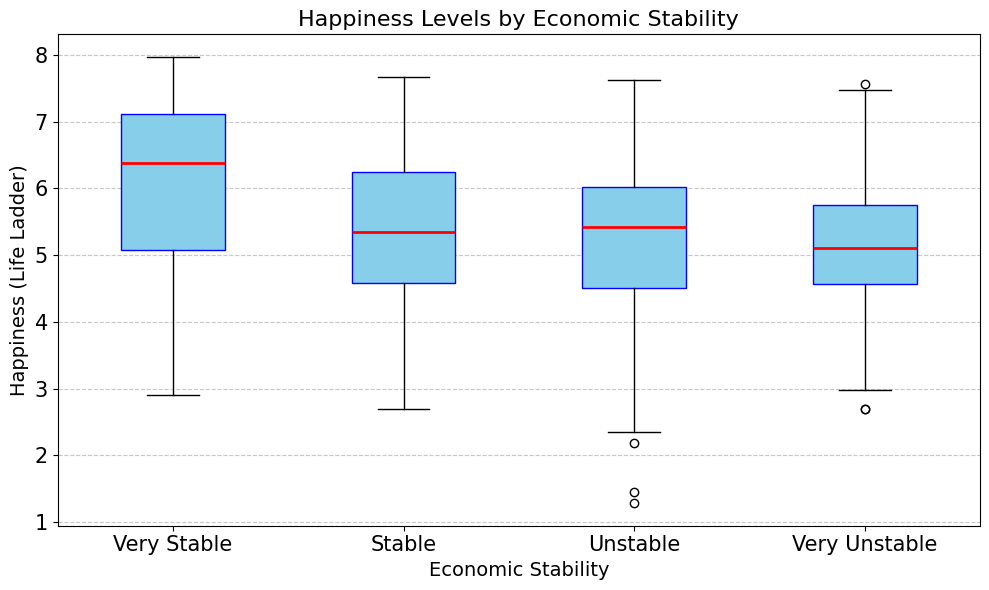

In [6]:
# Quetsion 4 Does a stable economy have a correlation with happiness?

# Calculate GDP stability and merge with filtered data
gdp_stability = (
    happiness_filtered.groupby("Country name")["Log GDP per capita"].std().reset_index()
)
gdp_stability.rename(
    columns={"Log GDP per capita": "GDP Stability (std)"}, inplace=True
)
data_with_stability = happiness_filtered.merge(gdp_stability, on="Country name")
data_with_stability["Stability Group"] = pd.qcut(
    data_with_stability["GDP Stability (std)"],
    q=4,
    labels=["Very Stable", "Stable", "Unstable", "Very Unstable"],
)
stability_groups = ["Very Stable", "Stable", "Unstable", "Very Unstable"]
boxplot_data = [
    data_with_stability[data_with_stability["Stability Group"] == group]["Life Ladder"]
    for group in stability_groups
]

# Plot Happiness Levels by Economic Stability
plt.figure(figsize=(10, 6))
plt.boxplot(
    boxplot_data,
    labels=stability_groups,
    patch_artist=True,
    boxprops=dict(facecolor="skyblue", color="blue"),
    medianprops=dict(color="red", linewidth=2),
)
plt.title("Happiness Levels by Economic Stability", fontsize=16)
plt.xlabel("Economic Stability", fontsize=14)
plt.ylabel("Happiness (Life Ladder)", fontsize=14)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("../Graph/happiness_vs_economic_stability.png")
plt.show()